# Importing Libraries

In [9]:
import pandas as pd # Preprocessing
import numpy as np # Array
import matplotlib.pyplot as plt # Visualization
import seaborn as sns # Visualization
sns.set()
import os
path = os.getcwd()

### Loading Dataset

In [10]:
train = pd.read_csv(path+"\\train.csv")
test = pd.read_csv(path+"\\test.csv")
sample_sub = pd.read_csv(path+"\\sample_submission.csv")

In [11]:
train.shape, test.shape, sample_sub.shape

((131662, 14), (87395, 13), (87395, 2))

In [13]:
train

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131657,T0005908509,11.72,D,1.0,2.74229,A,A,3.28500,0,61.0,47,76,Male,3
131658,T0005908510,74.81,C,7.0,2.81059,C,A,0.44500,0,NaN,63,88,Male,2
131659,T0005908512,40.17,C,10.0,2.99565,B,A,3.33625,0,NaN,48,75,Female,2
131660,T0005908513,46.88,B,4.0,3.04744,A,B,4.15750,1,47.0,54,79,Male,2


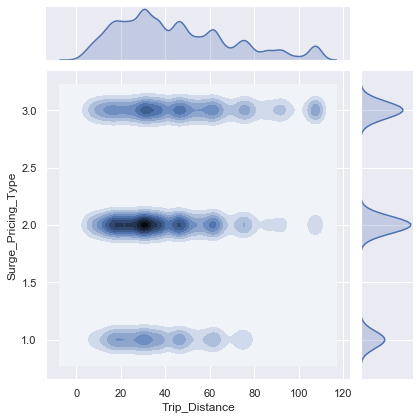

In [21]:
sns.jointplot('Trip_Distance', 'Surge_Pricing_Type', kind = 'kde', data = train)

---
# Data Dictionary

Trip_ID :ID for TRIP (Can not be used for purposes of modelling)

Trip_Distance : The distance for the trip requested by the customer
    
Type_of_Cab : Category of the cab requested by the customer

Customer_Since_Months : Customer using cab services since n months; 0 month means current month

Life_Style_Index : Proprietary index created by Sigma Cabs showing lifestyle of the customer based on their behaviour

Confidence_Life_Style_Index : Category showing confidence on the index mentioned above

Destination_Type : Sigma Cabs divides any destination in one of the 14 categories.

Customer_Rating : Average of life time ratings of the customer till date

Cancellation_Last_1Month : Number of trips cancelled by the customer in last 1 month

Var1, Var2 and Var3 : Continuous variables masked by the company. Can be used for modelling purposes

Gender : Gender of the customer

Surge_Pricing_Type : Predictor variable can be of 3 types

In [4]:
train.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [5]:
train['Type_of_Cab'].nunique()

5

---
# Hypothesis Generation

1. Cancellation_Last_1Month is inversly proportional to Customer_Rating.
2. Combination of Life_Style_Index and Confidence_Life_Style_Index and  is directly proportional to Surge_Pricing_Type. 
3. is there any specific pattern between Life_Style_Index and Type_of_Cab?
4. Check Relation between Trip_Distance and Type_of_Cab.
5. Relation between Life_Style_Index and Destination_Type. 
6. Analyze Customer_Since_Months and Customer_Rating. 
7. Long distance trips are more likely to be cancelled.

---
# Exploratory Data Anlysis

**1. Brief look at the Dataset.**

In [6]:
train.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Trip_Distance,131662.0,44.200909,25.522882,0.31000,24.58000,38.20000,60.73000,109.23000
Customer_Since_Months,125742.0,6.016661,3.626887,0.00000,3.00000,6.00000,10.00000,10.00000
Life_Style_Index,111469.0,2.802064,0.225796,1.59638,2.65473,2.79805,2.94678,4.87511
Customer_Rating,131662.0,2.849458,0.980675,0.00125,2.15250,2.89500,3.58250,5.00000
Cancellation_Last_1Month,131662.0,0.782838,1.037559,0.00000,0.00000,0.00000,1.00000,8.00000
Var1,60632.0,64.202698,21.820447,30.00000,46.00000,61.00000,80.00000,210.00000
Var2,131662.0,51.202800,4.986142,40.00000,48.00000,50.00000,54.00000,124.00000
Var3,131662.0,75.099019,11.578278,52.00000,67.00000,74.00000,82.00000,206.00000
Surge_Pricing_Type,131662.0,2.155747,0.738164,1.00000,2.00000,2.00000,3.00000,3.00000


**2. Shape of Dataset, Target Variable and Features**

In [8]:
print(f"Shape of train is: {train.shape}")
print(f"Shape of test is: {test.shape}")

target = "Surge_Pricing_Type"
id_col = "Trip_ID"

features = [col for col in train.columns if col not in [target, id_col] ]

Shape of train is: (131662, 14)
Shape of test is: (87395, 13)


**3. Check The Distribution of Target Variable**

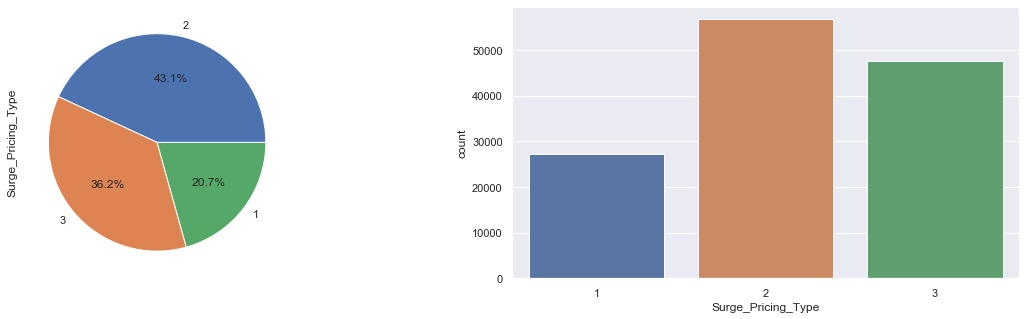

In [9]:
f, ax = plt.subplots(1, 2, figsize = (20, 5))
axx = ax.flatten()

train[target].value_counts().plot(kind = 'pie', autopct = "%1.1f%%", ax = axx[0])
sns.countplot(train[target], ax = axx[1])

**4. Check the Datatypes of Variables**

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  111452 non-null  object 
 3   Customer_Since_Months        125742 non-null  float64
 4   Life_Style_Index             111469 non-null  float64
 5   Confidence_Life_Style_Index  111469 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         60632 non-null   float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

**5. Number of Missing Values**

In [11]:
train_null = train.isna().sum()/train.shape[0]*100
test_null = test.isna().sum()/test.shape[0]*100
null = pd.concat([train_null, test_null], axis = 1)

In [12]:
null

,0,1
Trip_ID,0.000000,0.000000
Trip_Distance,0.000000,0.000000
Type_of_Cab,15.349911,15.055781
Customer_Since_Months,4.496362,4.538017
Life_Style_Index,15.336999,15.249156
Confidence_Life_Style_Index,15.336999,15.249156
Destination_Type,0.000000,0.000000
Customer_Rating,0.000000,0.000000
Cancellation_Last_1Month,0.000000,0.000000
Var1,53.948748,53.537388


**6. Unique Values in each Variable**

In [13]:
pd.concat([train.nunique(), test.nunique()], axis = 1)

,0,1
Trip_ID,131662,87395.0
Trip_Distance,10326,9942.0
Type_of_Cab,5,5.0
Customer_Since_Months,11,11.0
Life_Style_Index,55978,44857.0
Confidence_Life_Style_Index,3,3.0
Destination_Type,14,14.0
Customer_Rating,3931,3857.0
Cancellation_Last_1Month,9,9.0
Var1,122,105.0


---
# Univariate Analysis

In [14]:
cat_cols = ['Type_of_Cab', 'Customer_Since_Months', 'Confidence_Life_Style_Index', 'Destination_Type', 'Cancellation_Last_1Month', 'Gender']
num_cols = ['Trip_Distance', 'Life_Style_Index', 'Customer_Rating', 'Var1', 'Var2', 'Var3']

### Categorical Variable

1. Pie Plots

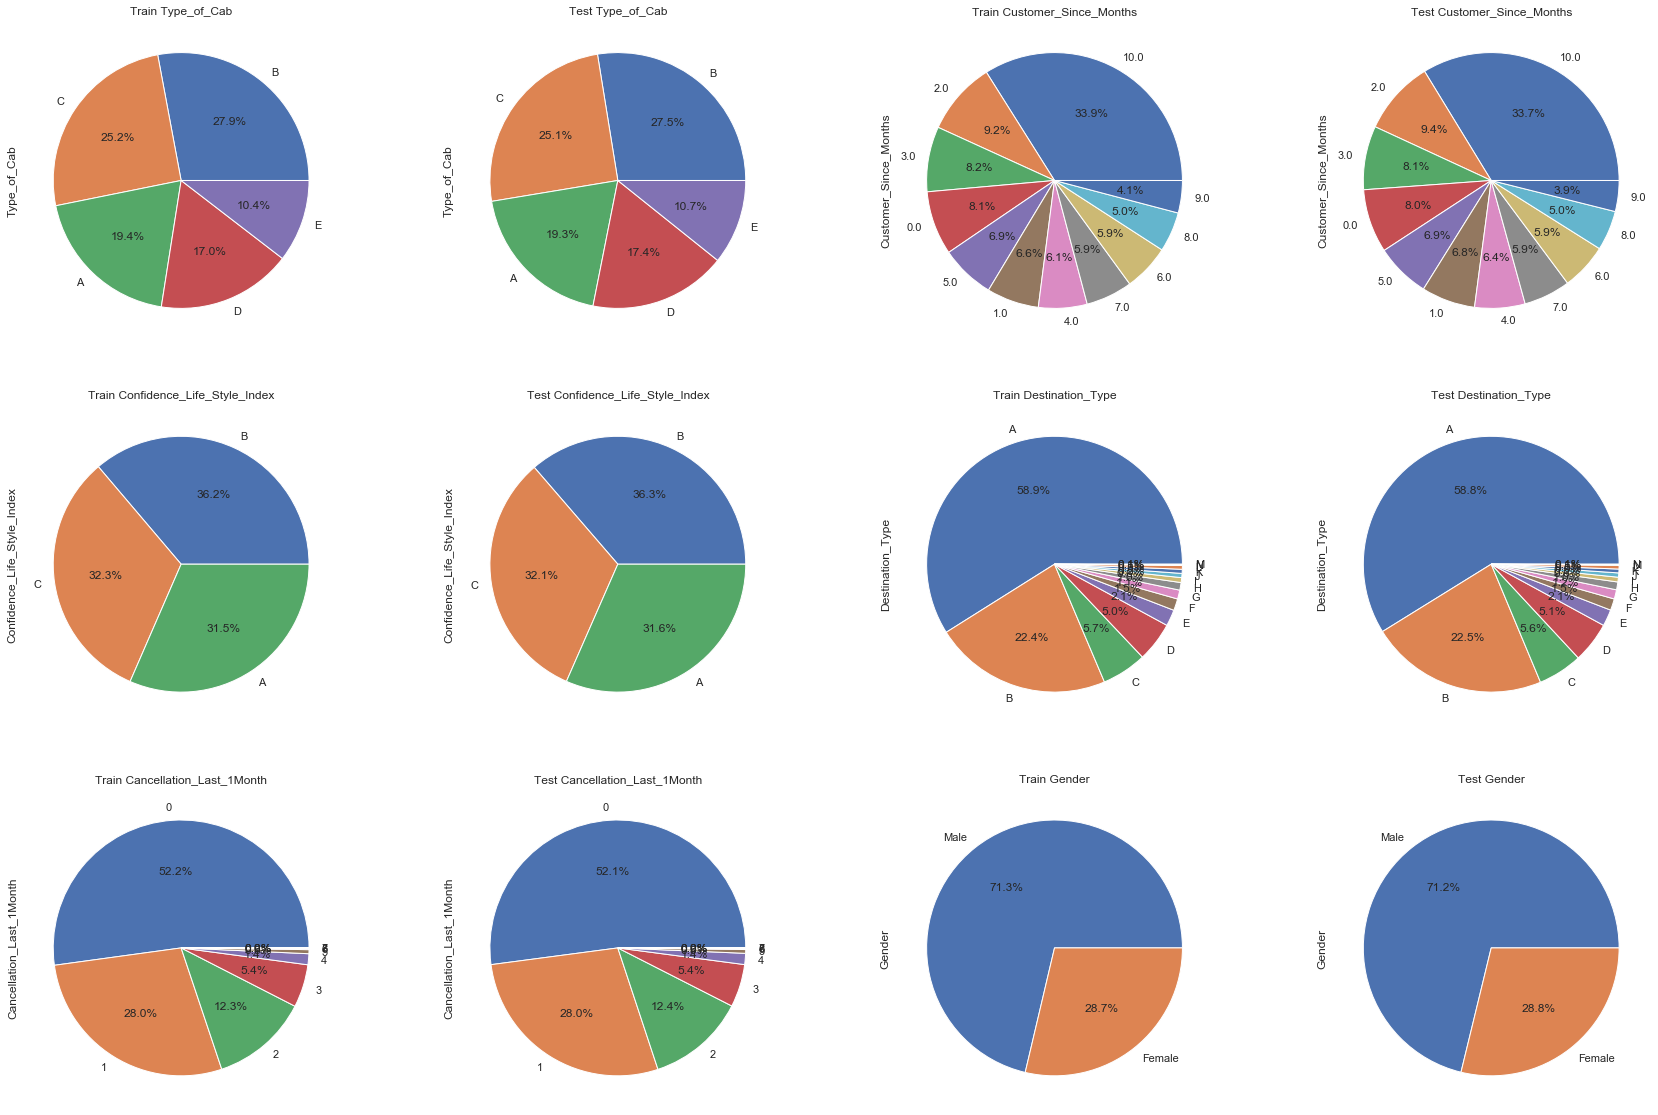

In [15]:
f, ax = plt.subplots(3, 4, figsize = (30,20))
axx = ax.flatten()
index = 0

for col in cat_cols:
    train[col].value_counts().plot.pie(autopct = '%1.1f%%', title='Train '+col, ax = axx[index])
    index+=1
    test[col].value_counts().plot.pie(autopct = '%1.1f%%', title='Test '+col, ax = axx[index])
    index+=1

### Insights : 

1. Type **E** is the least used Cab_type. 
2. Most of our customers are old.
3. 30% deviation to the True value in Confidence_Life_Style_Index.
4. **A** is the most frequent Destination type. Majority of the destination types comprise of A, B, C & D.
5. 50% of the time, Cab gets cancelled. Of the cancelled cabs, maximum cancellation done by user is 3.

### Feature Ideas:
    1. 'Customer_Since_Monts' : Is particular customer is old or not.
    2. 'Train Destination Types' : Binary and Ternary Feature - 
                                        i. Binary : {Most used or not}.
                                        ii. Ternary : A, B+C+D, or else.
    

2. Countplots

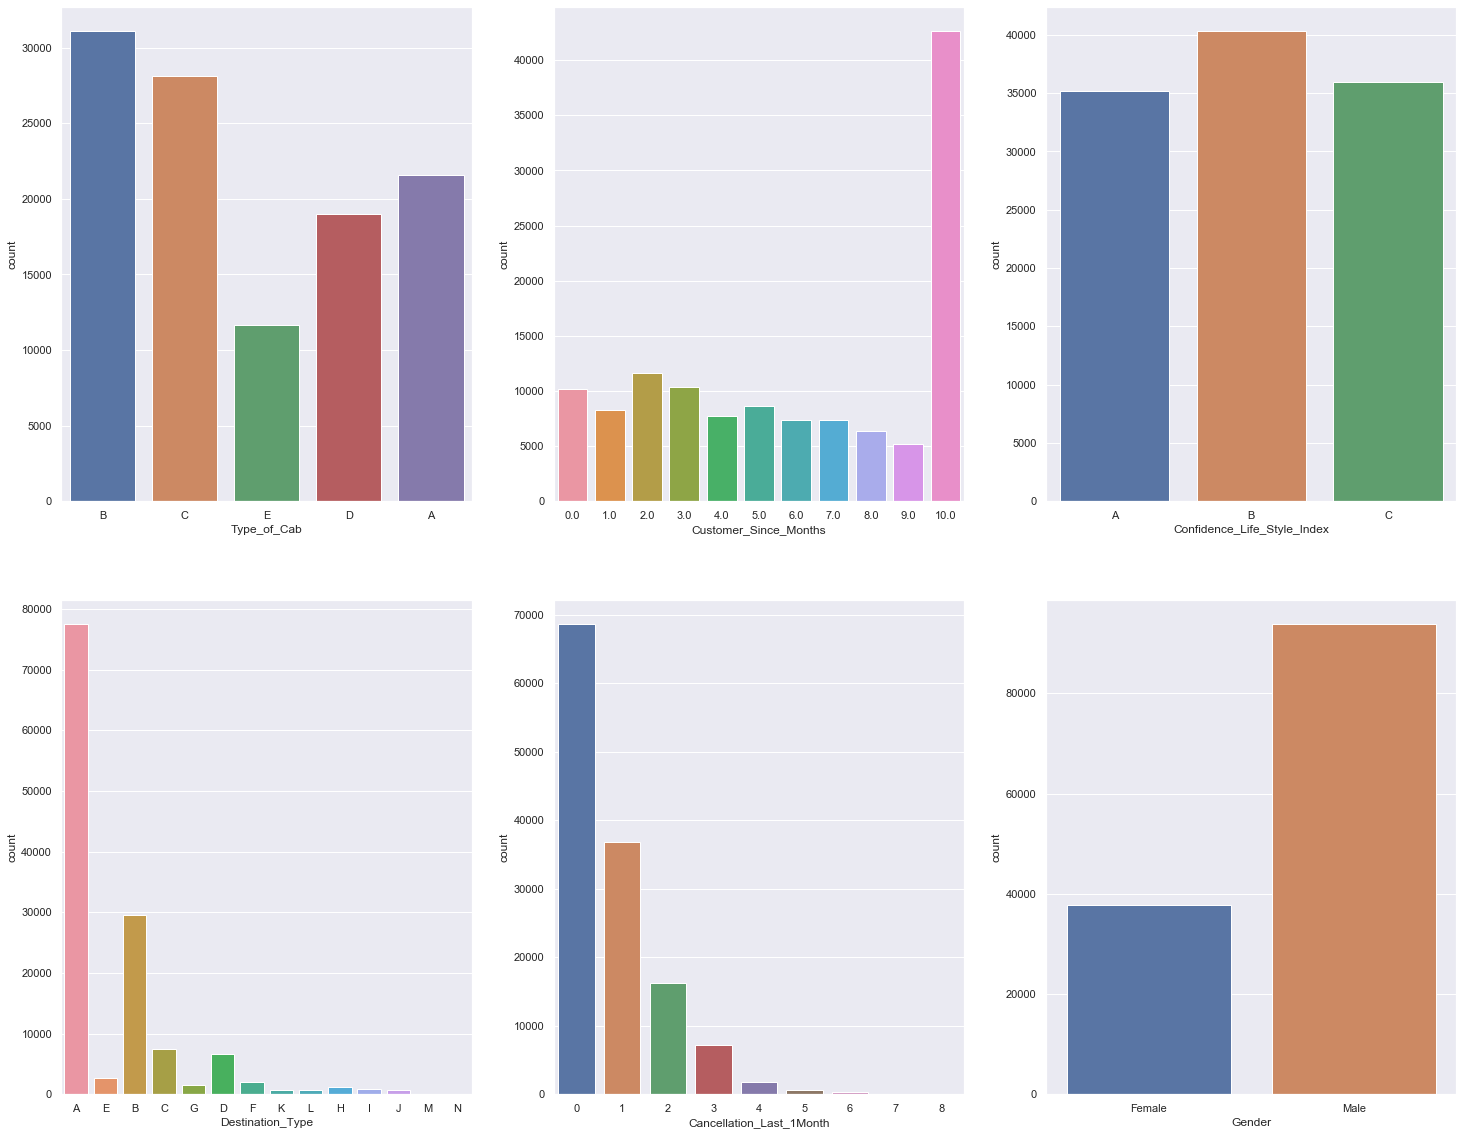

In [16]:
f, ax = plt.subplots(2, 3, figsize = (25,20))
axx = ax.flatten()
index = 0

for index, col in enumerate(cat_cols):
    sns.countplot(train[col], ax = axx[index])

### Operations to be done:

1. Merge "M" and "N" in `Destination_Type`.
2. Merge 5, 6, 7, 8 in `Cancellation_Last_1Month`

### Numerical Variables

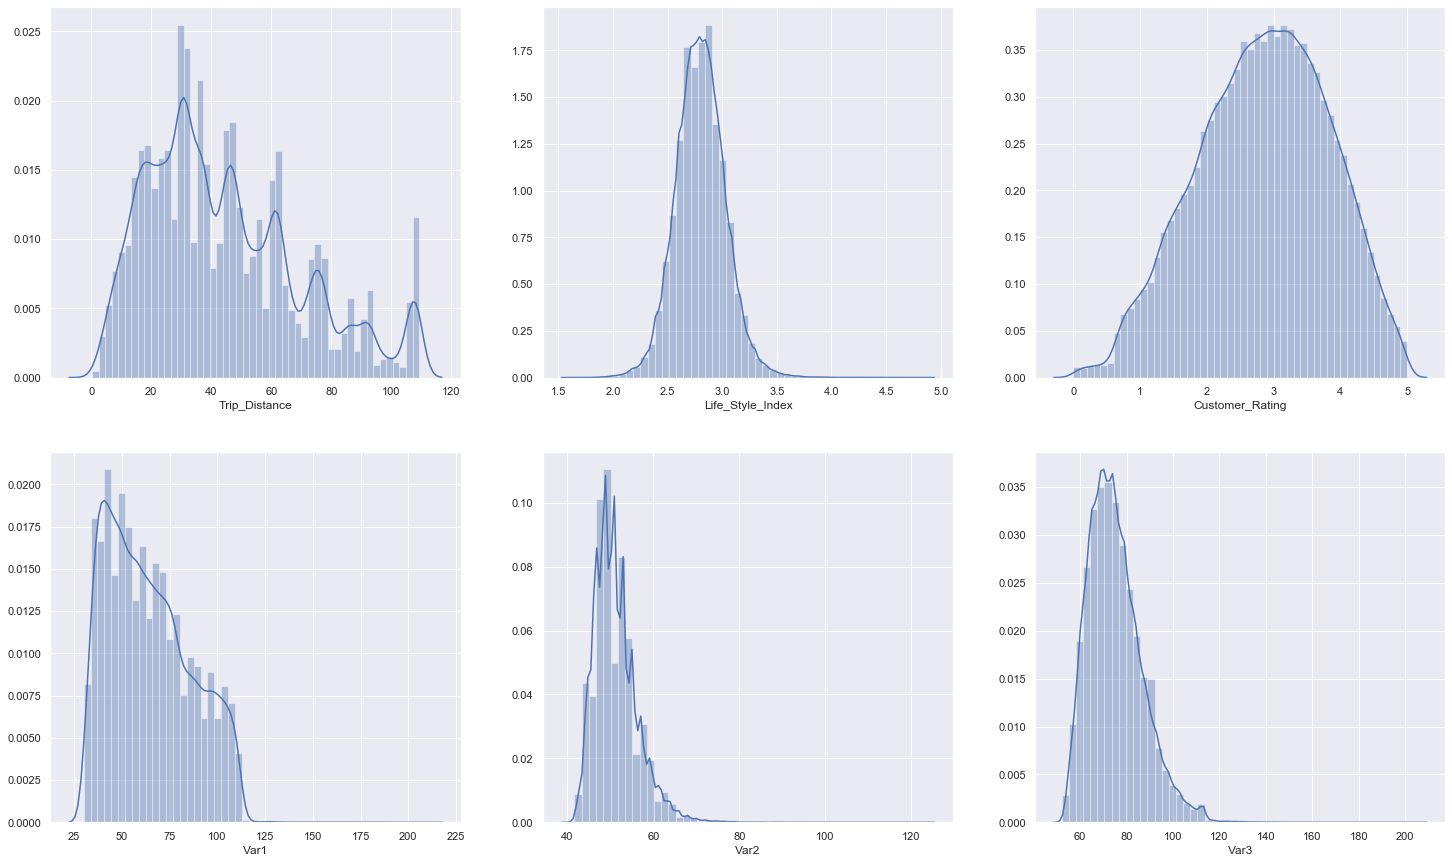

In [17]:
f, ax = plt.subplots(2, 3, figsize = (25,15))
axx = ax.flatten()
index = 0

for index, col in enumerate(num_cols):
    sns.distplot(train[col], ax = axx[index])

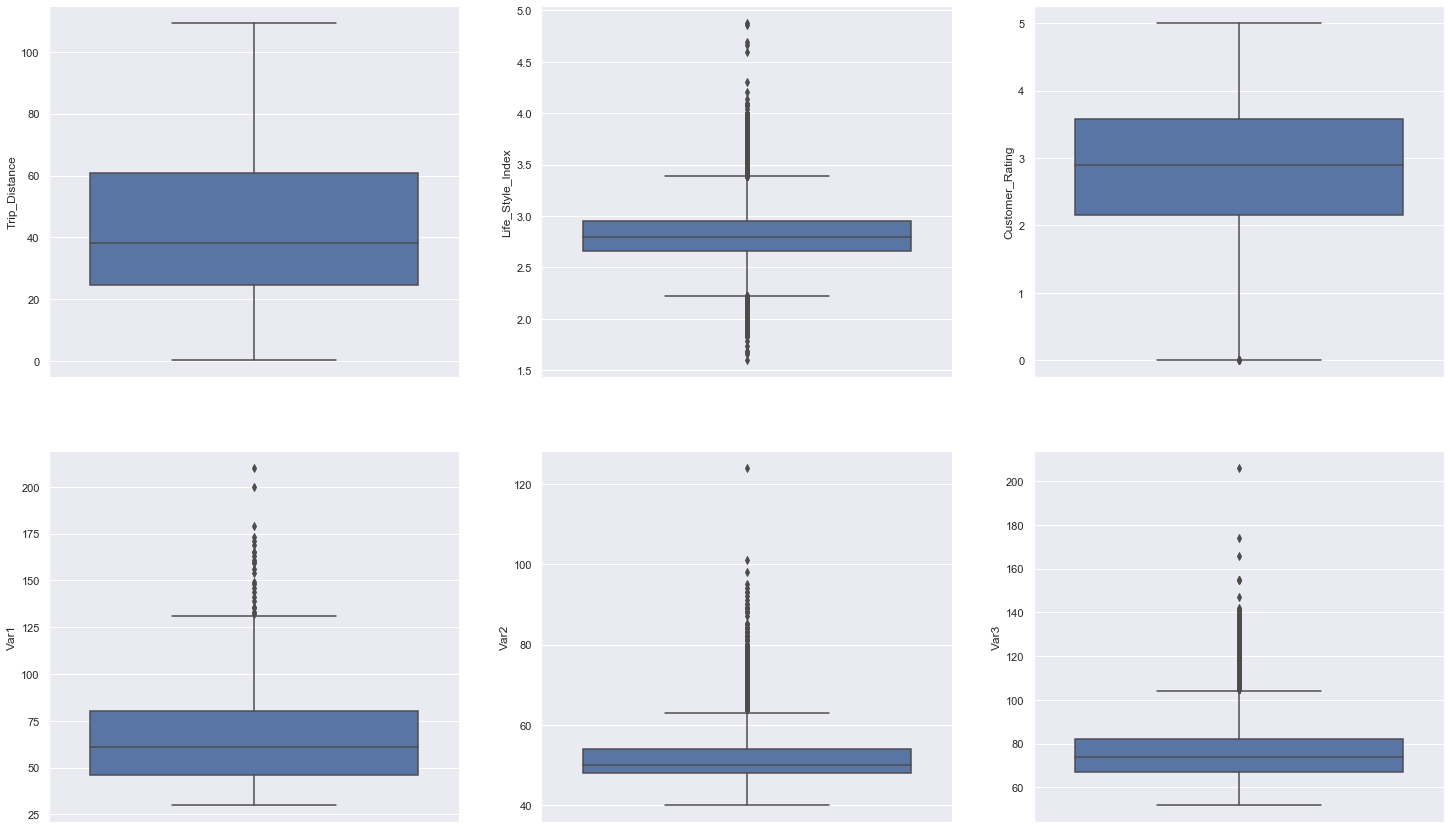

In [18]:
f, ax = plt.subplots(2, 3, figsize = (25,15))
axx = ax.flatten()
index = 0

for index, col in enumerate(num_cols):
    sns.boxplot(train[col], ax = axx[index], orient = 'v')

### Feature Ideas : 
    1. 'Trip Distance' : Quatenary feature, short(<15), medium(between 15-45), long(between(45-75), very long(75>)

---
# Bivariate Analysis

**Categorical Features with Target variable.**

1. Pie Plots

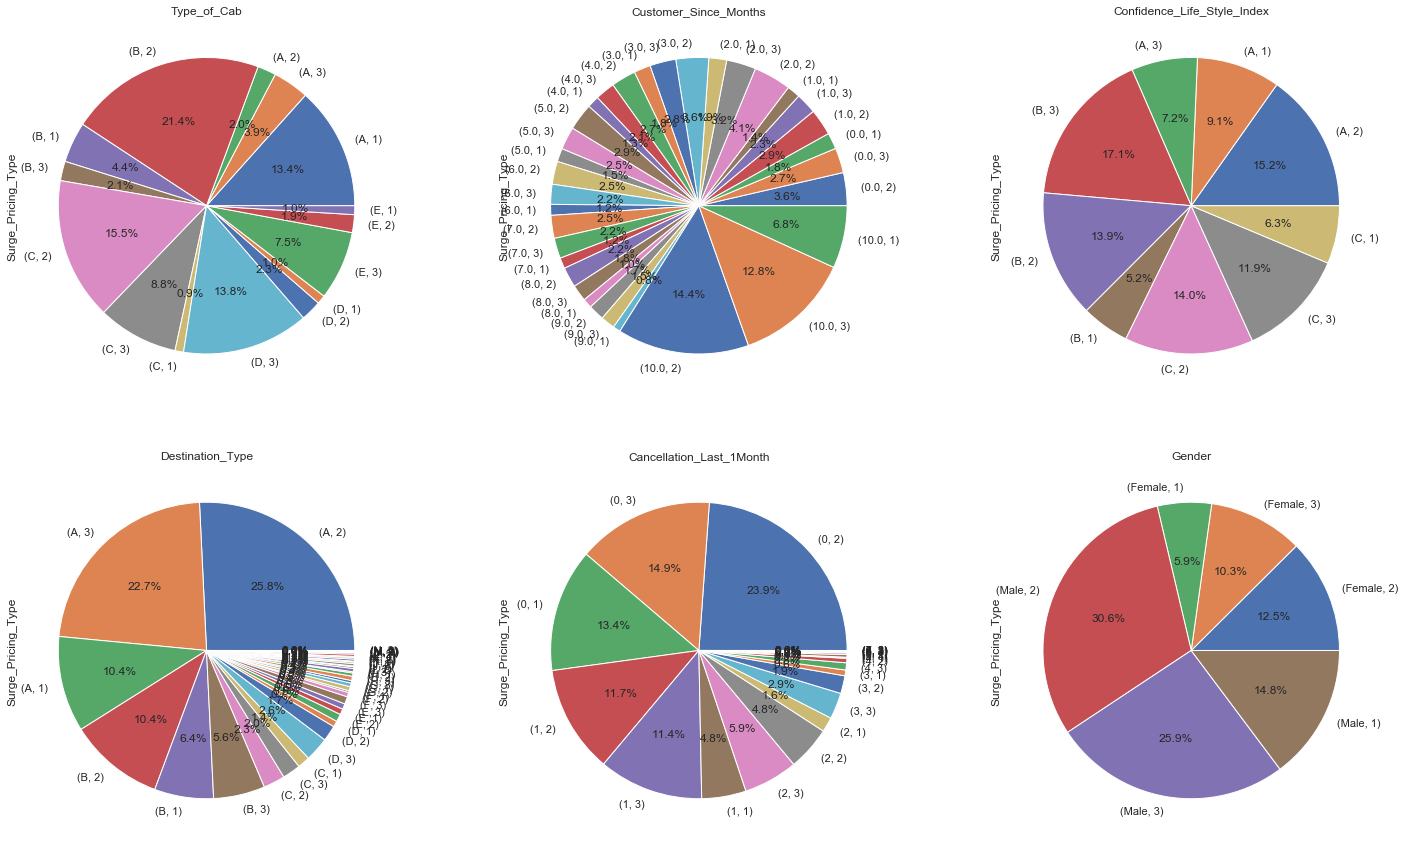

In [19]:
f, ax = plt.subplots(2, 3, figsize = (25,15))
axx = ax.flatten()

for index, col in enumerate(cat_cols):
    train.groupby(col)[target].value_counts().plot.pie(autopct = '%1.1f%%', ax = axx[index], title = col)

### Insights:

1. A>B>C>D>E. 

    Cab type A is prone to Surge_Pricing 1.
    
    Cab type B and C are prone to Surge_Pricing 2. 
    
    Cab type D and E are prone to Surge_Pricing 3.
    

2. Old customers are least likely have to Surge_Pricing 1.

3. Destination type A is less likely to have surge_pricing : 1 and
    Destination type B is more likely to have surge_pricing : 2. (30% more chance)

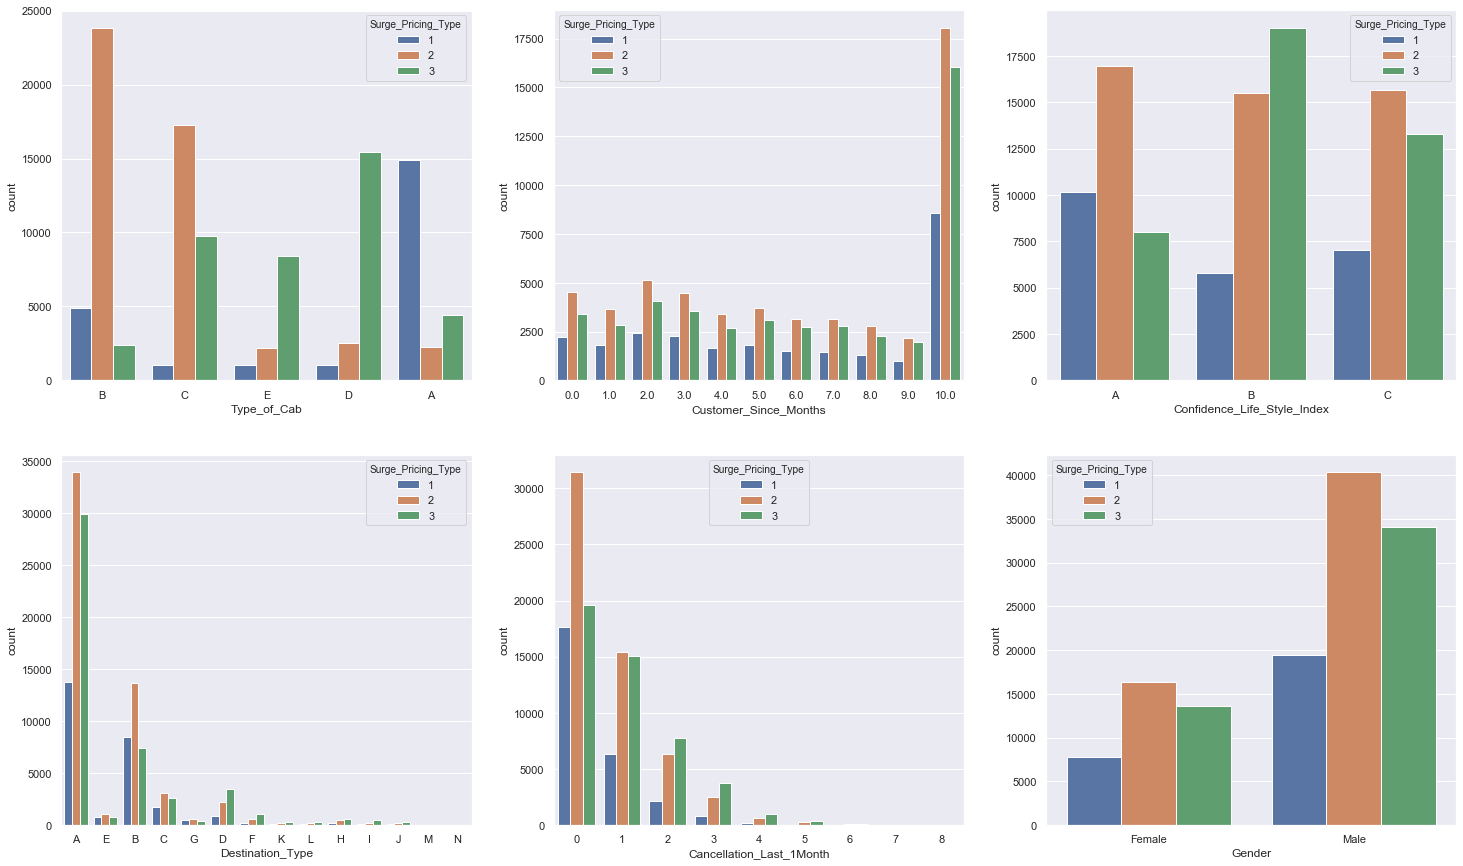

In [20]:
f, ax = plt.subplots(2, 3, figsize = (25,15))
axx = ax.flatten()

for index, col in enumerate(cat_cols):
    sns.countplot(train[col],hue = train[target], ax = axx[index])

### Insights: 

1. Destination Type [D, F, K, L, H, I, J] are more likely to have surge_pricing 3.
2. Cancellation_last_1month and surge_pricing-3 are directly proportional.
3. Cancellation_last_1month and surge_pricing-1 are inversly proportional.

#### Feature_ideas:
    1. Destination_type: Binary Feature:
                            if Destination type is in [D, F, K, L, H, I, J] then 1 else 0.

**Numerical Variables**

1. Boxplot

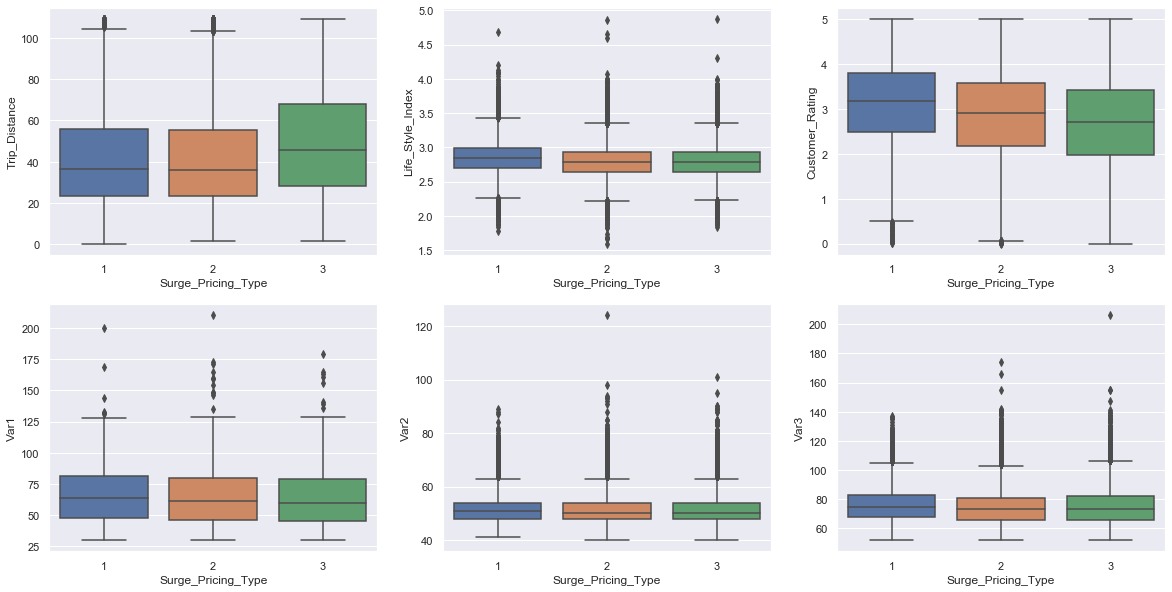

In [21]:
f, ax = plt.subplots(2, 3, figsize = (20, 10))
axx = ax.flatten()

for index, col in enumerate(num_cols):
    sns.boxplot(train[target], train[col], ax = axx[index])

### Insights:

1. Surge_Pricing 3 is associated with lower customer rating.
2. Surge_Pricing 1 is associated with higher customer rating.

2. Catplot

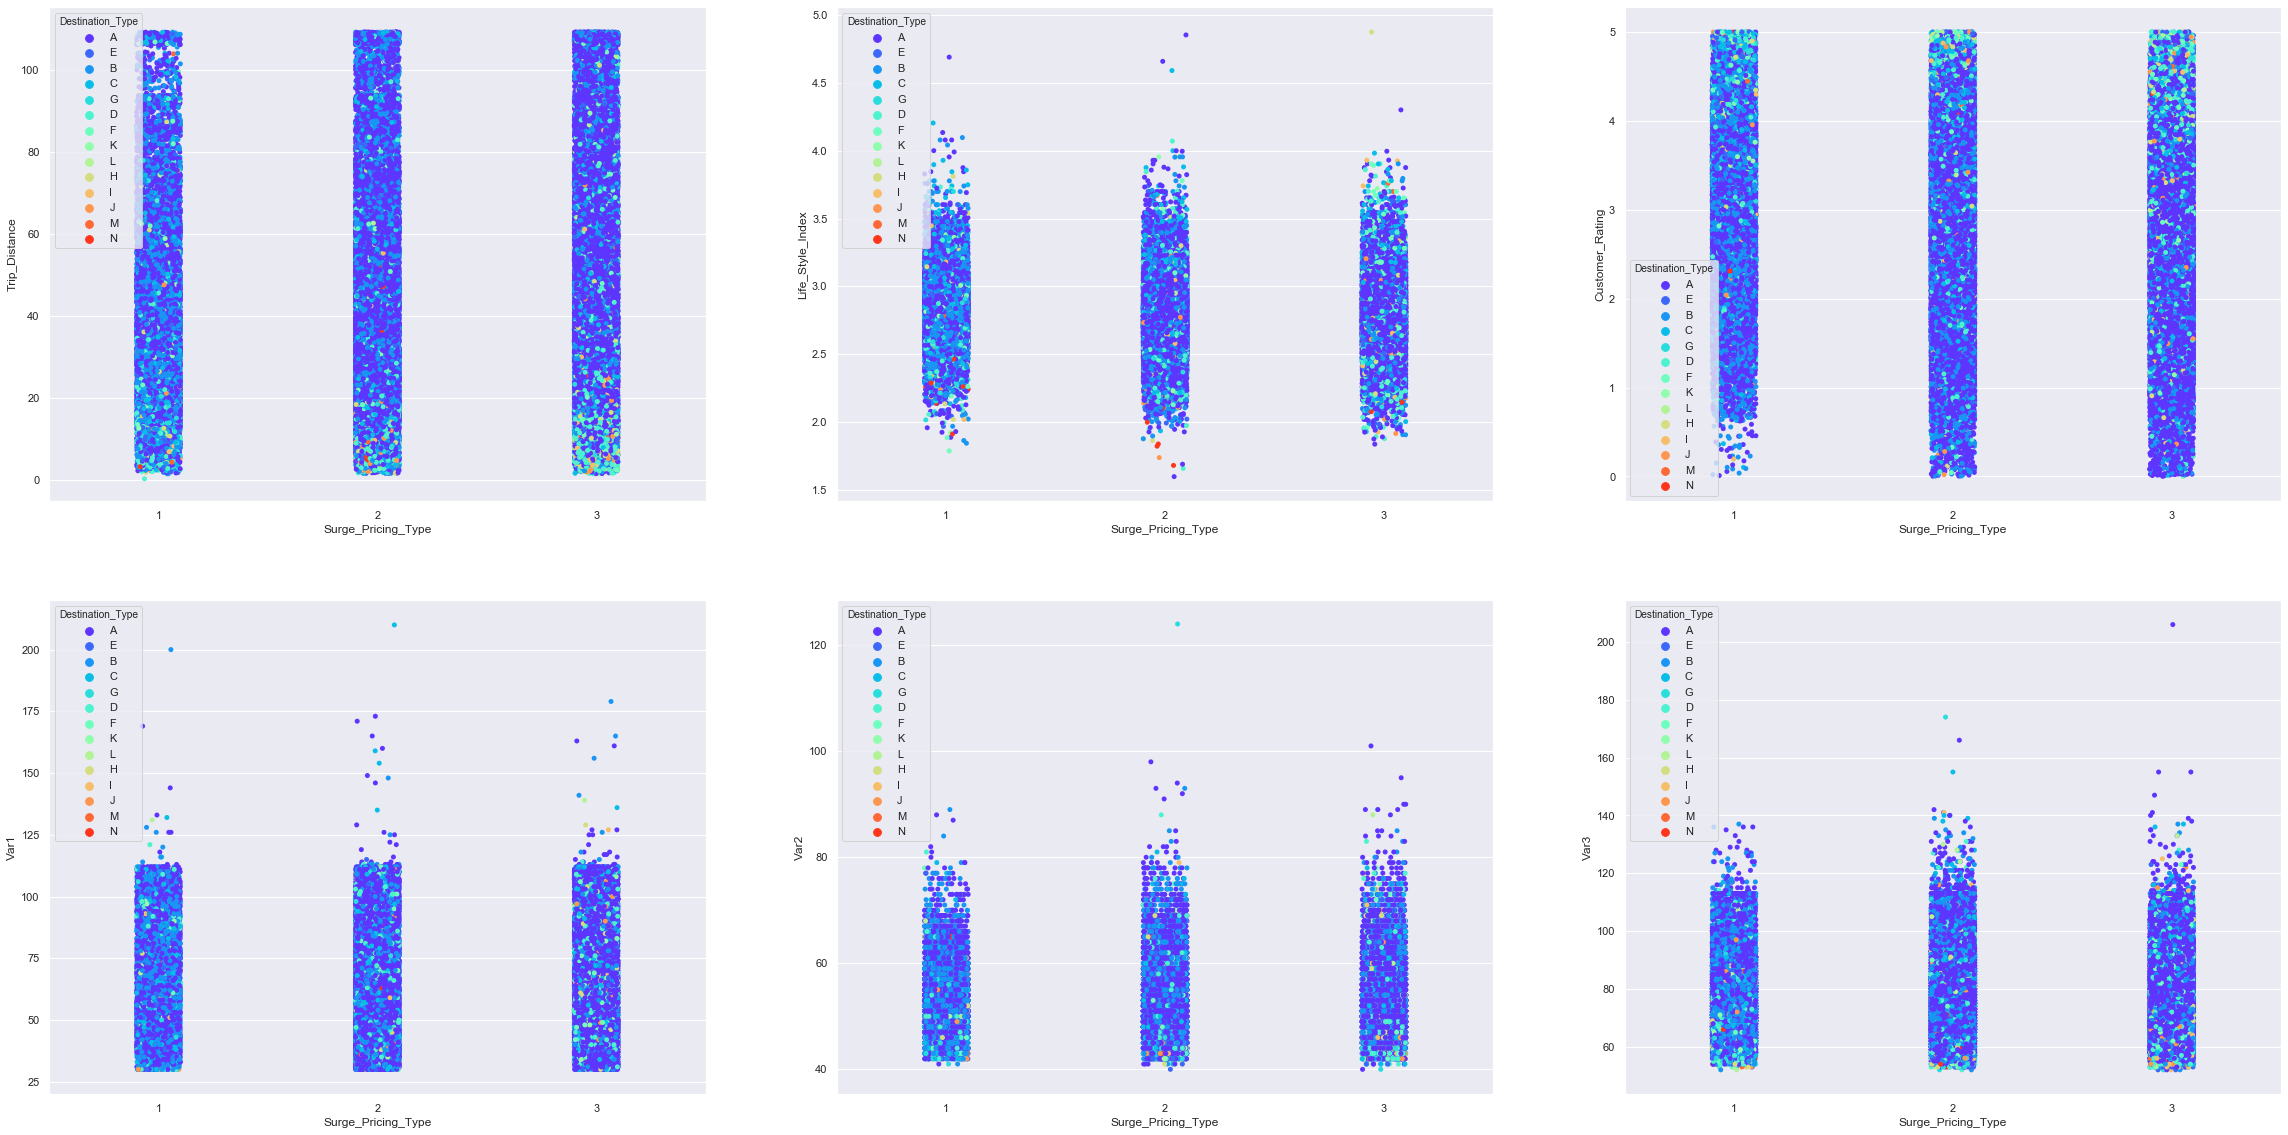

In [71]:
f, ax = plt.subplots(2, 3, figsize = (40, 20))
axx = ax.flatten()

for index, col in enumerate(num_cols):
    sns.stripplot(x = target, y = col, data = train, hue = 'Destination_Type',ax = axx[index], palette ='rainbow' )

#sns.catplot(x = target, y = 'Trip_Distance', data = train, hue = 'Type_of_Cab')

### Insights:

1. **Hue = Vehicle**:

    •Surge_Pricing: 1 are using **A** cab type.
    
    •Surge_Pricing: 2 are using **B and C** cab type.
    
    •Surge_Pricing: 1 are using **D and E** cab type.
    
    •Customers with rating less than 1 and type_of_cab C are likely to have surging_pricing : 2.
    
2. **Hue = Confidence**:

    •Customers with Confidence Life Style **A** are more likely to have trip distance less than 70.
    
    •Customers with trip distance >70 are more likely to have Confidence **B** or **C** only.

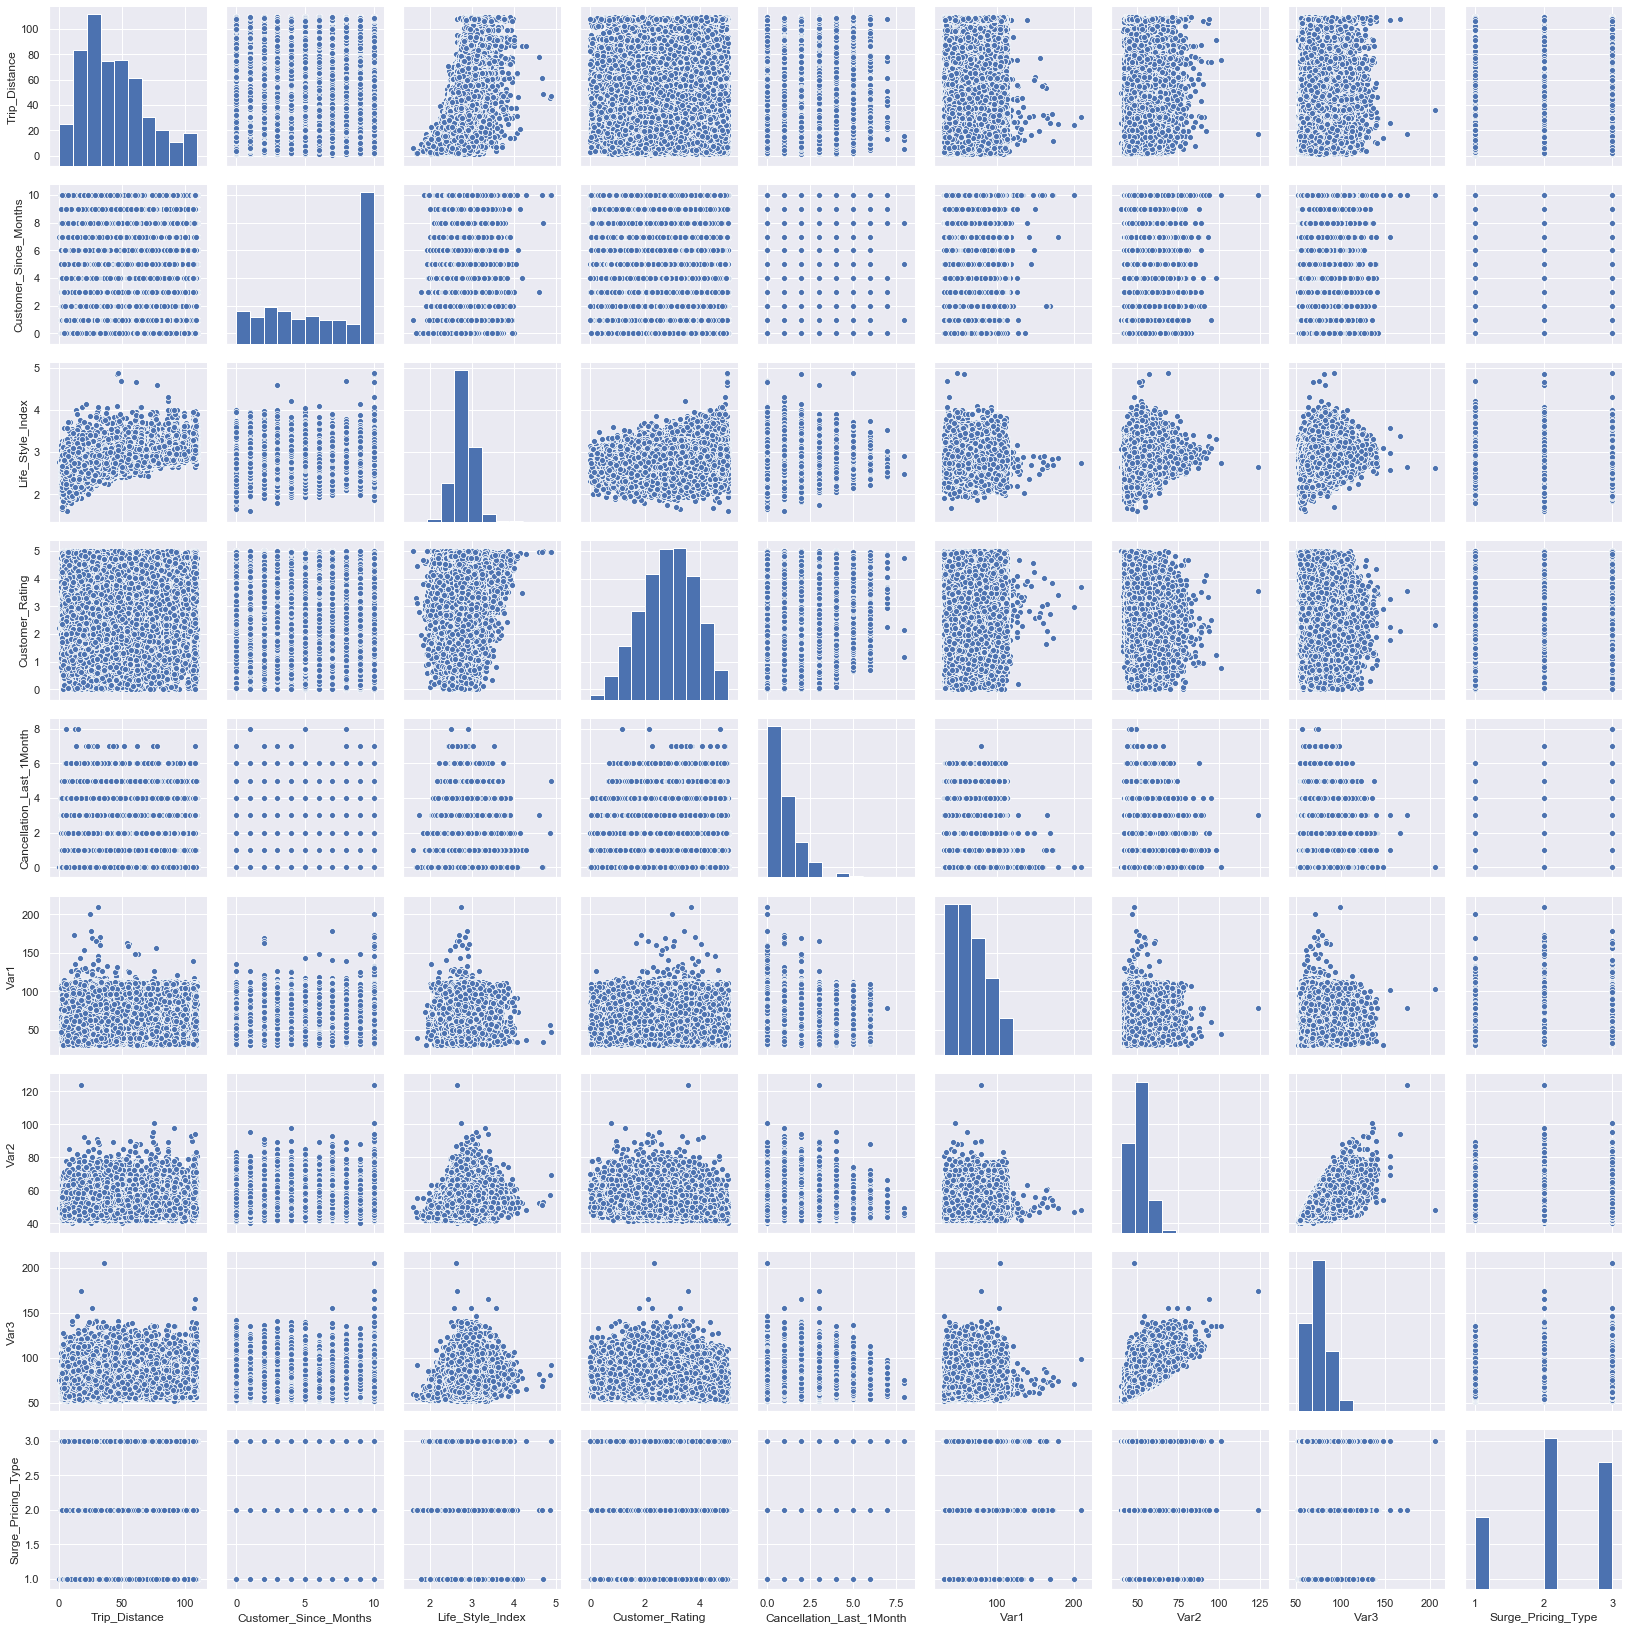

In [75]:
sns.pairplot(train)

## Further Analysis

1. Type_of_Cab and Destination Type
2. Trip_Distance of Type_of_Cab, Confidance_Life_Style_Index

#### 1. Type_of_Cab and Destination_Type

In [86]:
destination_list = ['A', 'E', 'B', 'C', 'G', 'D', 'F', 'K', 'L', 'H', 'I', 'J', 'M', 'N']

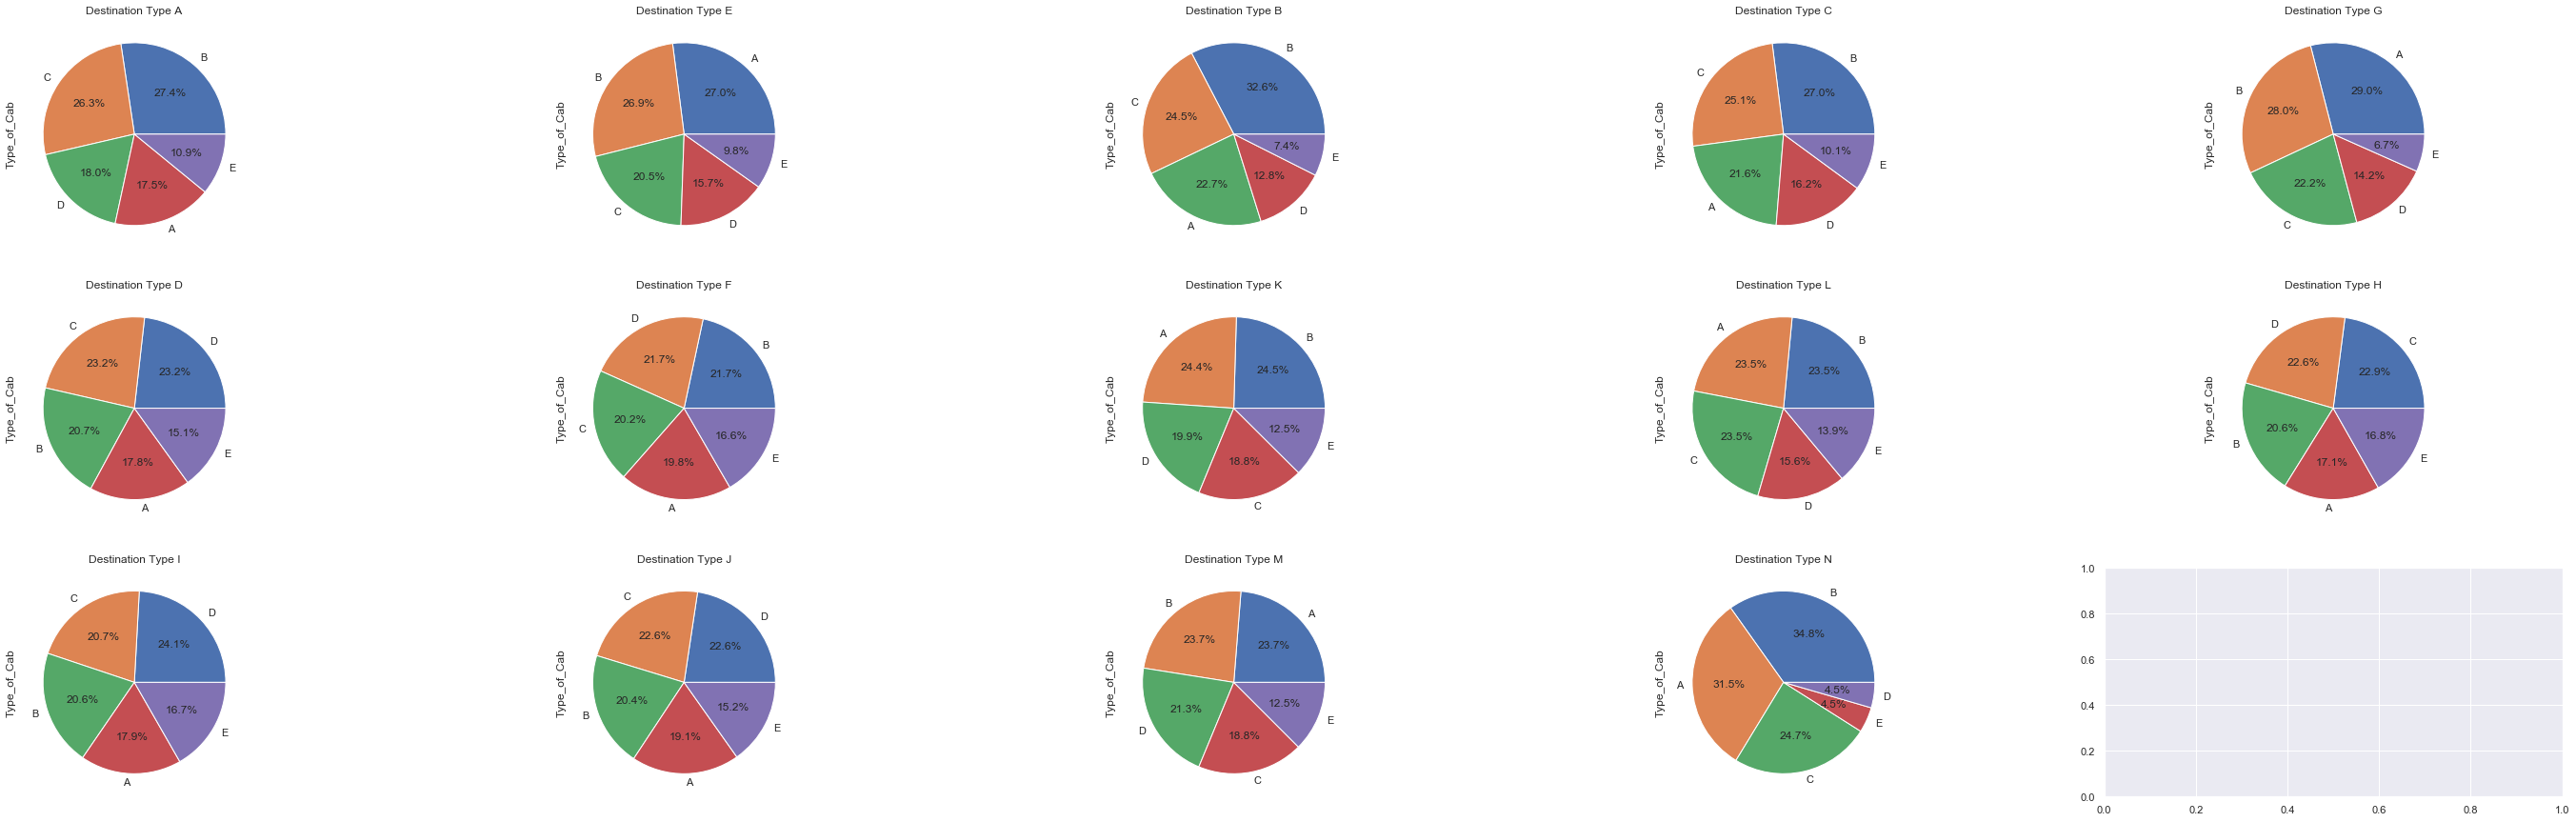

In [89]:
f, ax = plt.subplots(3, 5, figsize = (50, 15))
axx = ax.flatten()

for index, destination in enumerate(destination_list):
    train[ train['Destination_Type'] == destination]['Type_of_Cab'].value_counts().plot.pie(autopct = '%1.1f%%', ax = axx[index], title = f'Destination Type {destination}')

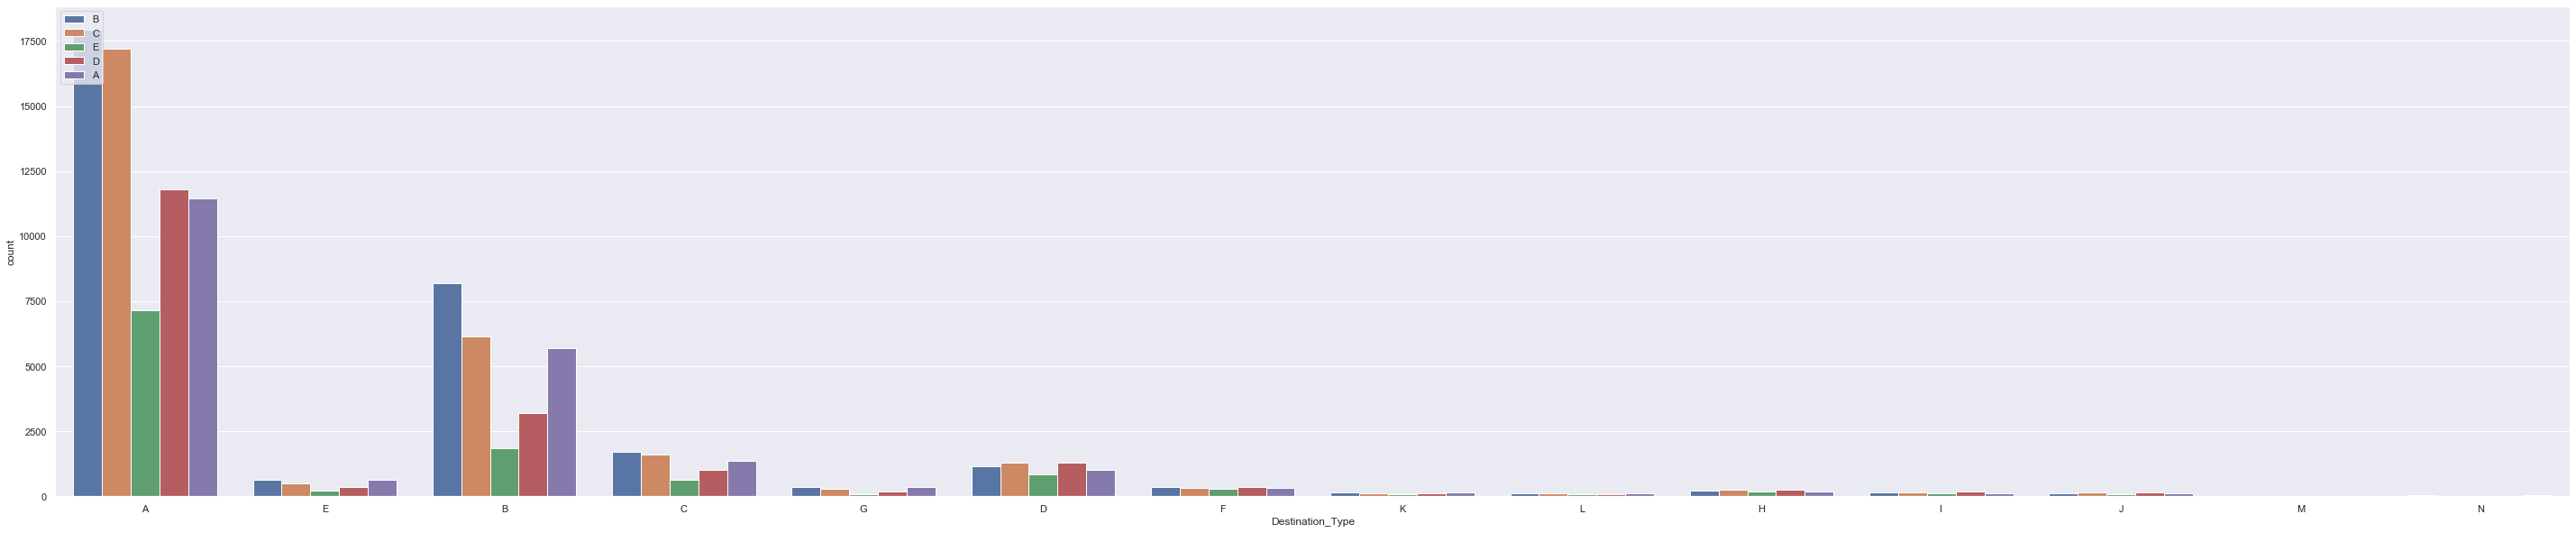

In [91]:
plt.figure(figsize = (50,10))
plot = sns.countplot(train['Destination_Type'],hue =  train['Type_of_Cab'] )
plot.legend(loc = 2)

#### 2. Trip_Distance ,  Confidence_Life_Style_Index, Type_of_Cab

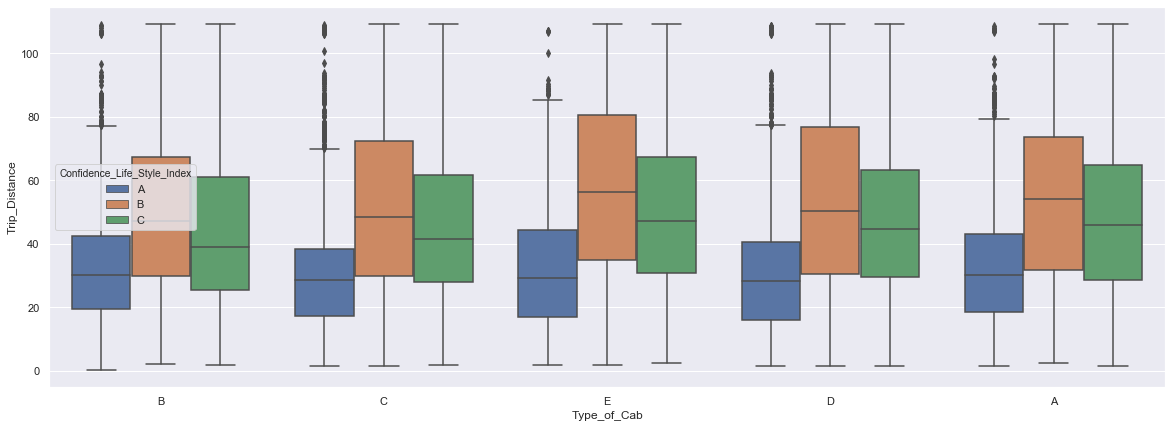

In [102]:
plt.figure(figsize = (20,7))
sns.boxplot(train['Type_of_Cab'],train['Trip_Distance'], hue = train['Confidence_Life_Style_Index'])

#### 3. Trip_Distance and Life_Style_Index

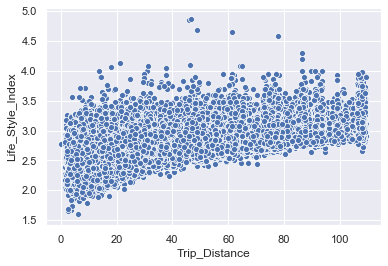

In [101]:
sns.scatterplot(data = train, x = 'Trip_Distance', y = 'Life_Style_Index')

---
# Hypothesis Testing

1. Cancellation_Last_1Month is inversly proportional to Customer_Rating.
2. Combination of Life_Style_Index and Confidence_Life_Style_Index and  is directly proportional to Surge_Pricing_Type. 
3. is there any specific pattern between Life_Style_Index and Type_of_Cab?
4. Check Relation between Trip_Distance and Type_of_Cab.
5. Relation between Life_Style_Index and Destination_Type. 
6. Analyze Customer_Since_Months and Customer_Rating. 
7. Long distance trips are more likely to be cancelled.

**1. Cancellation_Last_1Month is inversly proportional to Customer_Rating.**

Answer : There is no particular pattern in these two features.

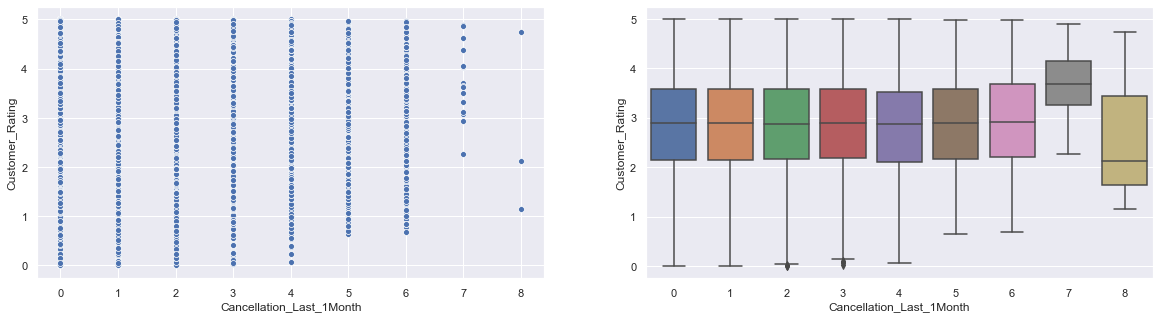

In [112]:
f, ax = plt.subplots(1, 2, figsize = (20,5))
axx = ax.flatten()

sns.scatterplot(train['Cancellation_Last_1Month'], train['Customer_Rating'],ax = axx[0])
sns.boxplot(train['Cancellation_Last_1Month'], train['Customer_Rating'],ax = axx[1])

**2. Combination of Life_Style_Index and Confidence_Life_Style_Index is directly proportional to Surge_Pricing_Type.**

Answer : 
   1. Confidence_Life_Style_Index **A** is decreasing as **Surge_Pricing_Type** increases.
   2. Confidence_Life_Style_Index **A** is concentrated around **Life_Style_Index** 2.3 to 3.2.

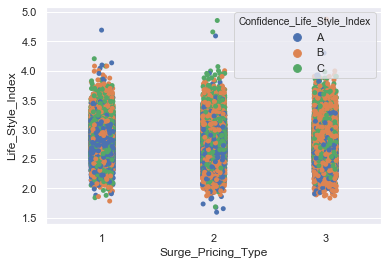

In [118]:
sns.stripplot(x = target, y = 'Life_Style_Index', data = train, hue = 'Confidence_Life_Style_Index', )

**3. is there any specific pattern between Life_Style_Index and Type_of_Cab?**

Ansewr: No. There is no pattern.

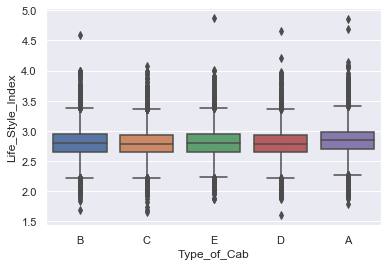

In [122]:
sns.boxplot( train['Type_of_Cab'], train['Life_Style_Index'], )

**4. Check Relation between Trip_Distance and Type_of_Cab.**

Median Trip_Distance of Type **E** Cab is reletively higher

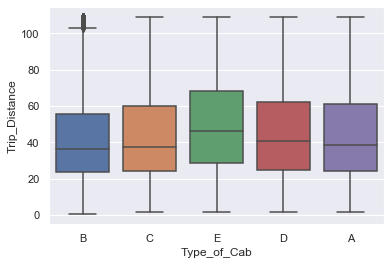

In [123]:
sns.boxplot(train['Type_of_Cab'], train['Trip_Distance'])

**5. Relation between Life_Style_Index and Destination_Type.**

No relationship

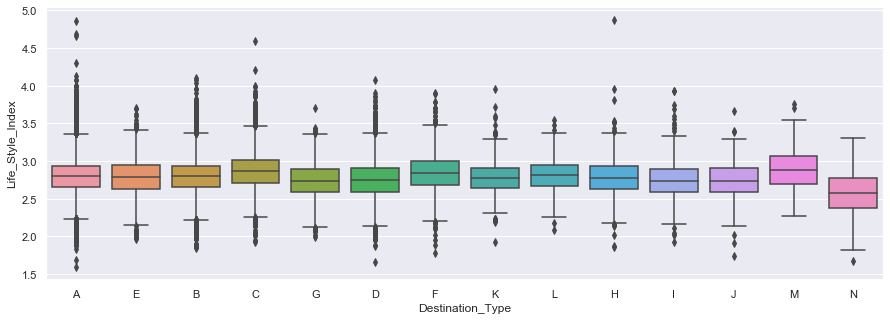

In [129]:
plt.figure(figsize = (15, 5))
sns.boxplot(train['Destination_Type'], train['Life_Style_Index'])

**6. Analyze Customer_Since_Months and Customer_Rating.**

No relationship

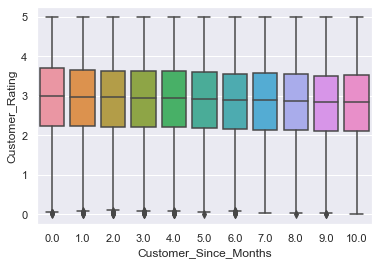

In [130]:
sns.boxplot(train['Customer_Since_Months'], train['Customer_Rating'])

**7. Long distance trips are more likely to be cancelled.**

False

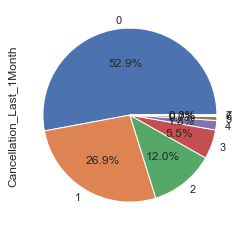

In [144]:
train[ train['Trip_Distance']>75]['Cancellation_Last_1Month'].value_counts().plot.pie(autopct = '%1.1f%%')

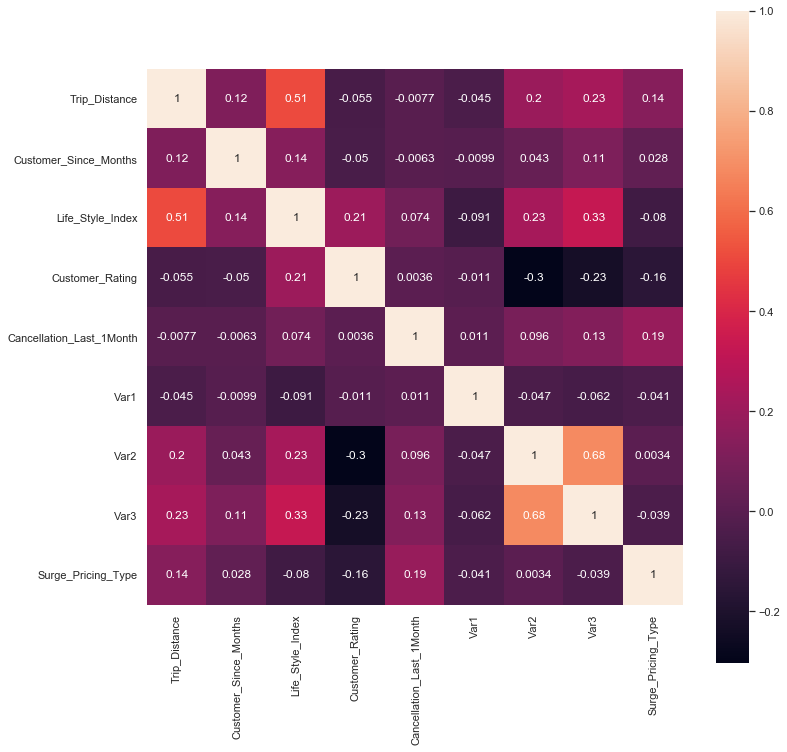

In [146]:
plt.figure(figsize = (12, 12))
sns.heatmap(train.corr(), square = True, annot = True)

---
# Rule Based Classifier

features : Trip Distance, Type_of_Cab, Confidence_Life_Style_Index, 

In [150]:
def rule_based_classifier(x):
    if (x['Type_of_Cab'] == 'A') and (x['Customer_Since_Months']!=10) and (x['Destination_Type']!='A'):
        return 1
    elif (x['Type_of_Cab'] == 'B') or (x['Type_of_Cab'] == 'C') and (x['Destination_Type'] == 'B'):
        return 2
    else:
        return 3

In [154]:
%%time
sample_sub['Surge_Pricing_Type'] = test.apply(lambda x: rule_based_classifier(x), axis = 1)

Wall time: 2.69 s


In [159]:
sample_sub.to_csv(path + '\\rule_based_classifier.csv', index = False)